In [1]:
import pandas as pd
import numpy as np



In [2]:
counts = pd.read_csv('combined_featureCounts_WT_D_1repl.csv')
counts
combined_data = counts.iloc[:-12]
combined_data

,Geneid,W1,W3,W5,W7,W9,D1,D3,D5
0,ENSG00000228037,9,7,2,9,0,5,9,11
1,ENSG00000142611,0,0,0,2,0,0,0,1
2,ENSG00000284616,0,0,0,0,0,0,0,0
3,ENSG00000157911,214,291,266,227,5,236,386,278
4,ENSG00000260972,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
63235,ENSG00000271254,62,28,67,105,0,96,63,71
63236,ENSG00000275987,0,0,0,0,0,0,0,0
63237,ENSG00000268674,0,0,0,0,0,0,0,0
63238,ENSG00000277475,0,0,0,0,0,0,0,0


In [3]:
counts = counts.iloc[:-12]
counts

,Geneid,W1,W3,W5,W7,W9,D1,D3,D5
0,ENSG00000228037,9,7,2,9,0,5,9,11
1,ENSG00000142611,0,0,0,2,0,0,0,1
2,ENSG00000284616,0,0,0,0,0,0,0,0
3,ENSG00000157911,214,291,266,227,5,236,386,278
4,ENSG00000260972,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
63235,ENSG00000271254,62,28,67,105,0,96,63,71
63236,ENSG00000275987,0,0,0,0,0,0,0,0
63237,ENSG00000268674,0,0,0,0,0,0,0,0
63238,ENSG00000277475,0,0,0,0,0,0,0,0


In [4]:
counts = counts.set_index('Geneid')
counts = counts[counts.sum(axis = 1) > 0]

counts.columns = counts.columns.str.replace('Aligned.sortedByCoord.out_featureCounts', '')

/tmp/ipykernel_1857212/3602240907.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  counts.columns = counts.columns.str.replace('Aligned.sortedByCoord.out_featureCounts', '')


In [5]:
counts = counts.T
counts

Geneid,ENSG00000228037,ENSG00000142611,ENSG00000157911,ENSG00000229280,ENSG00000142655,ENSG00000149527,ENSG00000171621,ENSG00000224387,ENSG00000142583,ENSG00000287727,...,ENSG00000278673,ENSG00000277400,ENSG00000276256,ENSG00000273748,ENSG00000277196,ENSG00000278817,ENSG00000278384,ENSG00000276345,ENSG00000271254,ENSG00000275405
W1,9,0,214,1,192,91,64,0,0,3,...,1,1,79,40,0,1,18,2,62,0
W3,7,0,291,0,159,18,64,0,2,2,...,0,3,79,49,2,0,7,1,28,0
W5,2,0,266,0,162,35,33,0,0,5,...,0,5,66,43,1,0,16,1,67,0
W7,9,2,227,0,137,43,30,1,0,1,...,1,10,103,32,0,0,25,5,105,0
W9,0,0,5,0,7,0,6,0,0,0,...,0,0,4,4,0,0,0,0,0,1
D1,5,0,236,0,275,79,73,1,0,3,...,2,5,61,33,0,0,20,3,96,0
D3,9,0,386,0,229,37,123,0,1,3,...,0,7,104,53,0,0,16,1,63,1
D5,11,1,278,0,222,29,53,0,0,1,...,0,8,94,45,0,1,21,5,71,0


In [10]:
vst_data = dds.vst()
vst_data

Fitting dispersions...
... done in 4.07 seconds.

Fitting dispersion trend curve...
... done in 1.24 seconds.



In [16]:


normalized_data = np.log1p(counts)


/tmp/ipykernel_730451/4074426872.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dists, 'ward')


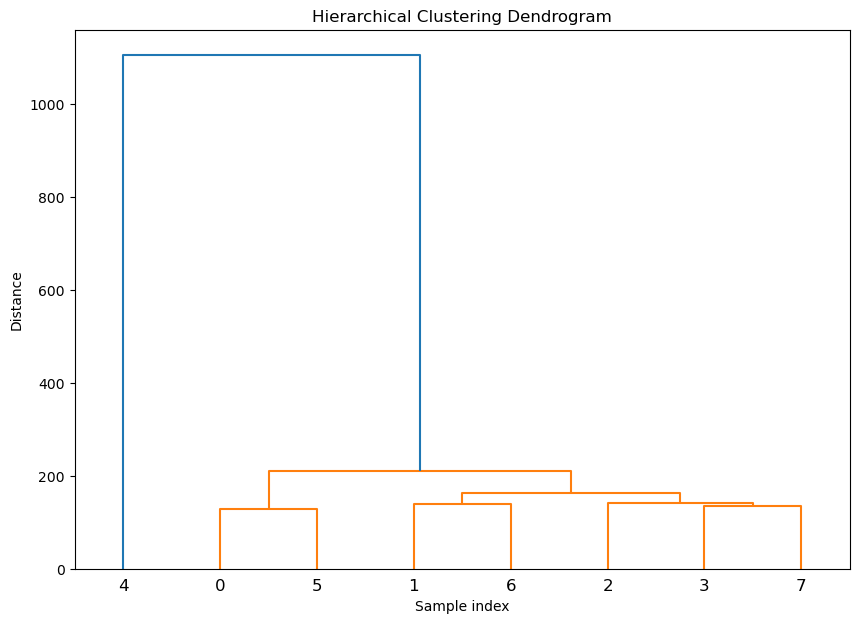

In [17]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

dists = squareform(pdist(normalized_data, metric='euclidean'))
linkage_matrix = linkage(dists, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

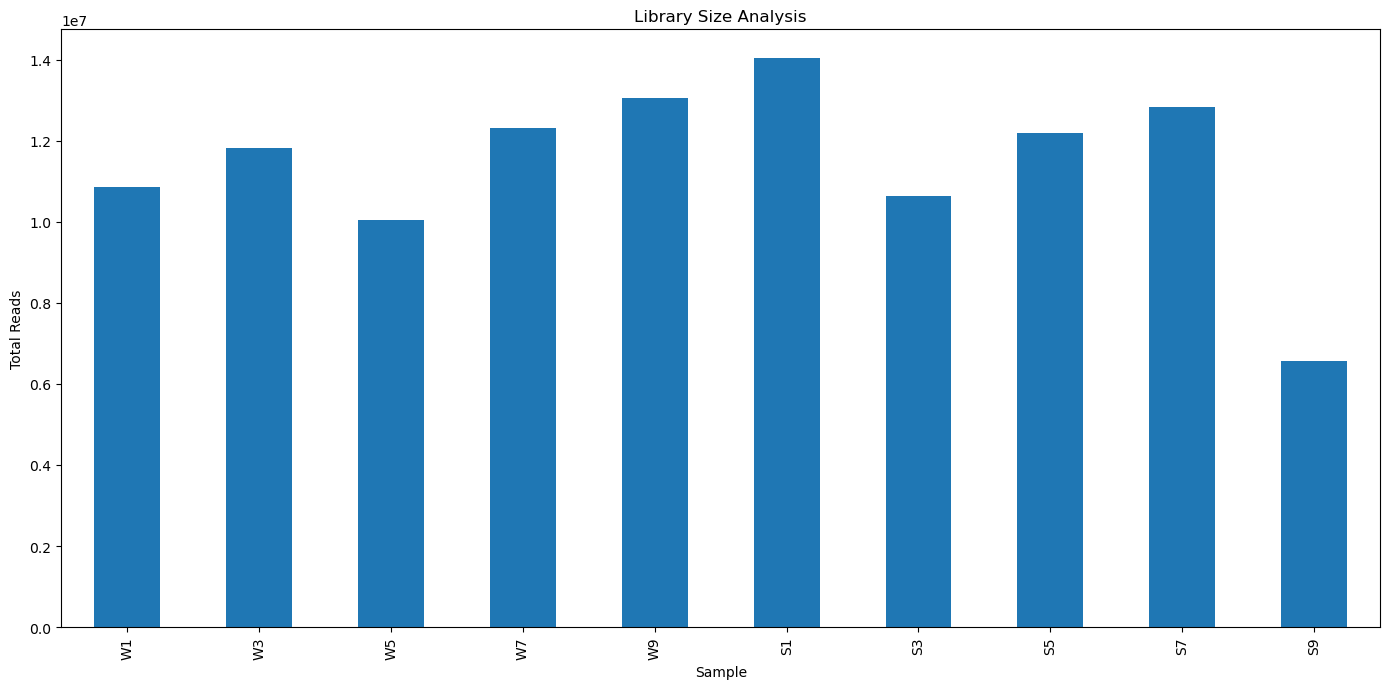

In [60]:
import matplotlib.pyplot as plt
data = pd.read_csv('combined_featureCounts_WT_LAV_1repl.csv')
library_sizes = data.drop('Geneid', axis=1).sum()
library_sizes_df = library_sizes.reset_index()
library_sizes_df.columns = ['Sample', 'Total Reads']


plt.figure(figsize=(14, 7))
library_sizes.plot(kind='bar')
plt.title('Library Size Analysis')
plt.xlabel('Sample')
plt.ylabel('Total Reads')
plt.xticks(rotation=90) 
plt.tight_layout()  

plot_path = 'figs/library_sizes_plot_LAV_one_repl.png'




('figs/sorted_viral_read_fraction_plot_LAV_1repl`.png',
   Sample  Viral Read Fraction
 0     W1             0.000026
 1     W3             0.000487
 2     W5             0.048015
 3     W7             0.165175
 4     W9             0.917962
 5     S1             0.000051
 6     S3             0.001305
 7     S5             0.114436
 8     S7             0.367030
 9     S9             0.894100)

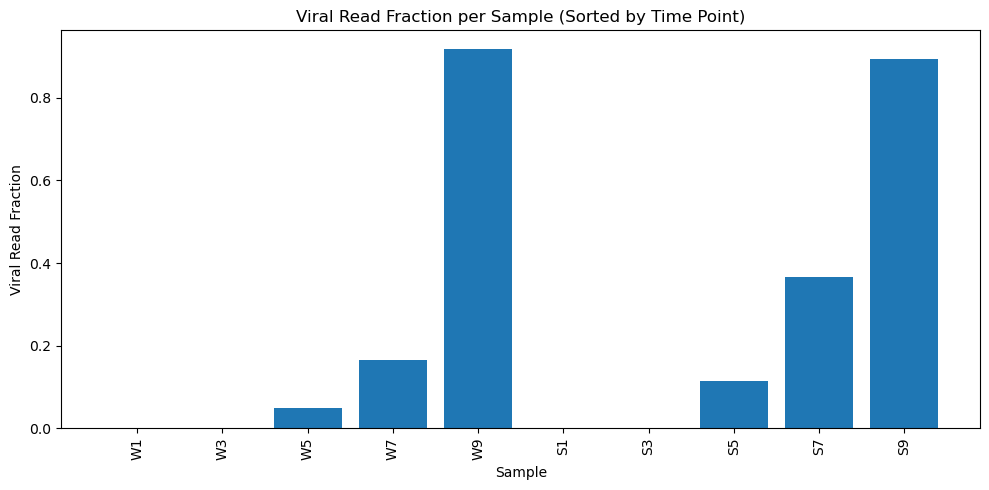

In [59]:
data = pd.read_csv('combined_featureCounts_WT_LAV_1repl.csv')
viral_genes = [
'ENSSASG00005000002',
 'ENSSASG00005000003',
 'ENSSASG00005000004',
 'ENSSASG00005000006',
 'ENSSASG00005000010',
 'ENSSASG00005000007',
 'ENSSASG00005000011',
 'ENSSASG00005000009',
 'ENSSASG00005000012',
 'ENSSASG00005000008',
 'ENSSASG00005000005',
 'ENSSASG00005000013']

viral_genes = set(viral_genes)
total_viral_reads = data[data['Geneid'].isin(viral_genes)].drop('Geneid', axis=1).sum()
total_reads_per_sample = data.drop('Geneid', axis=1).sum()

viral_read_fraction = total_viral_reads / total_reads_per_sample

viral_read_fraction_df = viral_read_fraction.reset_index()
viral_read_fraction_df.columns = ['Sample', 'Viral Read Fraction']

# Extract digits and keep as float to handle NaN
viral_read_fraction_df['Time Point'] = viral_read_fraction_df['Sample'].str.extract(r'_(\d+)_').astype(float)


# Option 2: Only convert non-NaN values to int and leave NaN as is (more complex handling might be required)




sorted_viral_read_fraction_df = viral_read_fraction_df.sort_values('Time Point')

plt.figure(figsize=(10, 5))
plt.bar(sorted_viral_read_fraction_df['Sample'], sorted_viral_read_fraction_df['Viral Read Fraction'], color='tab:blue')
plt.title('Viral Read Fraction per Sample (Sorted by Time Point)')
plt.xlabel('Sample')
plt.ylabel('Viral Read Fraction')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the sorted plot to a file
sorted_viral_plot_path = 'figs/sorted_viral_read_fraction_plot_LAV_1repl`.png'
plt.savefig(sorted_viral_plot_path, dpi=300, bbox_inches='tight')

sorted_viral_plot_path, sorted_viral_read_fraction_df[['Sample', 'Viral Read Fraction']].reset_index(drop=True)

In [55]:
import numpy as np
data = pd.read_csv('combined_featureCounts_WT_D_1repl.csv')
counts_samples = data.set_index('Geneid').loc[:, 'W1':]

tpm_all_samples = pd.DataFrame(index=counts_samples.index)
gene_lengths_simulated = pd.Series(np.random.randint(500, 2000, size=counts_samples.shape[0]), index=counts_samples.index)
for sample in counts_samples.columns:
    rpkm_sample = (counts_samples[sample] / gene_lengths_simulated) / (counts_samples[sample].sum() / 1e6)
    tpm_all_samples[sample] = (rpkm_sample / rpkm_sample.sum()) * 1e6

tpm_all_samples.head(20)



,W1,W3,W5,W7,W9,D1,D3,D5
Geneid,,,,,,,,
ENSG00000228037,0.530536,0.381376,0.124205,0.430296,0.000000,0.257597,0.434533,0.576302
ENSG00000142611,0.000000,0.000000,0.000000,0.287034,0.000000,0.000000,0.000000,0.157266
ENSG00000284616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000157911,11.262171,14.154176,14.747817,9.689164,0.148234,10.854733,16.638111,13.002835
ENSG00000260972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000224340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000226374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000229280,0.085002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000142655,13.146108,10.061815,11.685538,7.607967,0.270000,16.456121,12.842211,13.509331


In [51]:
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
geneid_to_symbol = {
    'ENSSASG00005000002': 'ORF1ab',
    'ENSSASG00005000003': 'ORF1ab',
    'ENSSASG00005000004': 'S',
    'ENSSASG00005000006': 'ORF3a',
    'ENSSASG00005000010': 'E',
    'ENSSASG00005000007': 'M',
    'ENSSASG00005000011': 'ORF6',
    'ENSSASG00005000009': 'ORF7a',
    'ENSSASG00005000012': 'ORF7b',
    'ENSSASG00005000008': 'ORF8',
    'ENSSASG00005000005': 'N',
    'ENSSASG00005000013': 'ORF10'
}
mapper = id_map(species='human')

combined_mapping = {**geneid_to_symbol, **mapper.mapper}

tpm_all_samples

,W1,W3,W5,W7,W9,S1,S3,S5,S7,S9,Symbol
Geneid,,,,,,,,,,,
ENSG00000228037,0.731878,0.521019,0.174600,0.635323,0.000000,0.565158,0.746396,0.501022,0.265760,0.000000,AL139246.3
ENSG00000142611,0.000000,0.000000,0.000000,0.088437,0.000000,0.039335,0.000000,0.134503,0.041618,0.000000,PRDM16
ENSG00000284616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL139823.1
ENSG00000157911,32.017347,39.849596,42.724015,29.481754,0.572383,30.616011,42.875463,37.398374,26.647812,0.669835,PEX10
ENSG00000260972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Z98259.1
...,...,...,...,...,...,...,...,...,...,...,...
ENSSASG00005000009,0.576866,11.022006,1407.799622,5230.701162,23701.076739,0.835232,25.370839,3086.968836,10306.468843,19272.418075,ORF7a
ENSSASG00005000012,0.000000,0.446225,52.337506,191.288337,1074.813126,0.000000,0.082866,30.179926,68.842267,184.557965,ORF7b
ENSSASG00005000008,0.721840,13.754442,1810.858820,6650.658138,34971.522213,1.317506,37.477196,4069.444052,13051.626476,26776.097090,ORF8


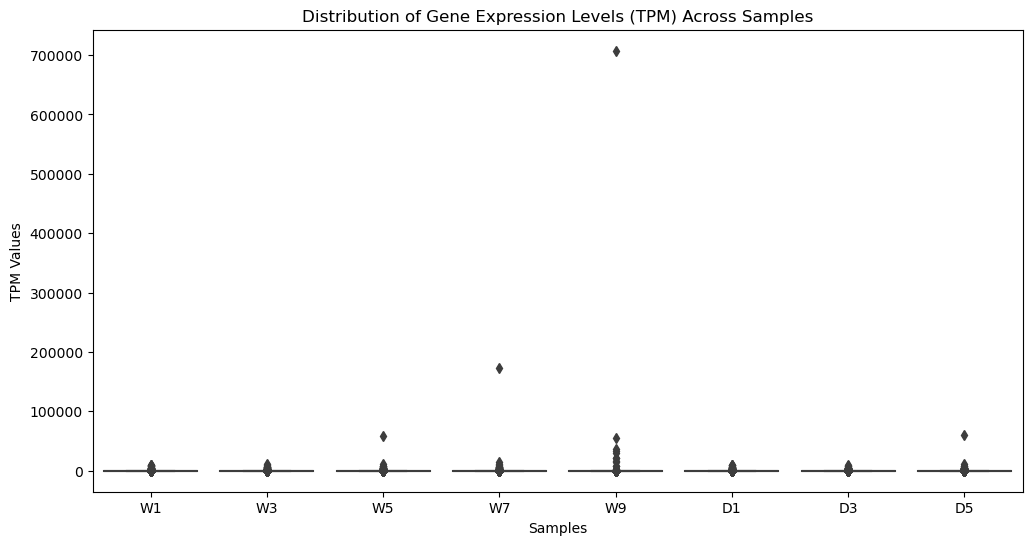

In [56]:

tpm_long_df = tpm_all_samples.reset_index().melt(id_vars='Geneid', var_name='Sample', value_name='TPM')

# Setting up the figure size
plt.figure(figsize=(12, 6))

# Creating a box plot
sns.boxplot(x='Sample', y='TPM', data=tpm_long_df)

# Adding titles and labels
plt.title('Distribution of Gene Expression Levels (TPM) Across Samples')
plt.xlabel('Samples')
plt.ylabel('TPM Values')

# Show the plot
plt.show()
